In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial

# Load the data
data_path = 'data.csv'
data = pd.read_csv(data_path)

# Display the first few rows to understand the structure
data.head()

<ipython-input-1-8d0fbef4d70f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Price Product A ($),Sales Product A (millions of unit),Price Product B ($),Sales Product B (millions of unit)
0,6.62,64.152047,6.75,54.512467
1,8.71,38.973806,12.67,0.000000
2,7.07,64.686109,9.91,31.309992
3,6.08,71.023195,5.42,66.603478
4,5.94,69.913545,12.82,0.000000


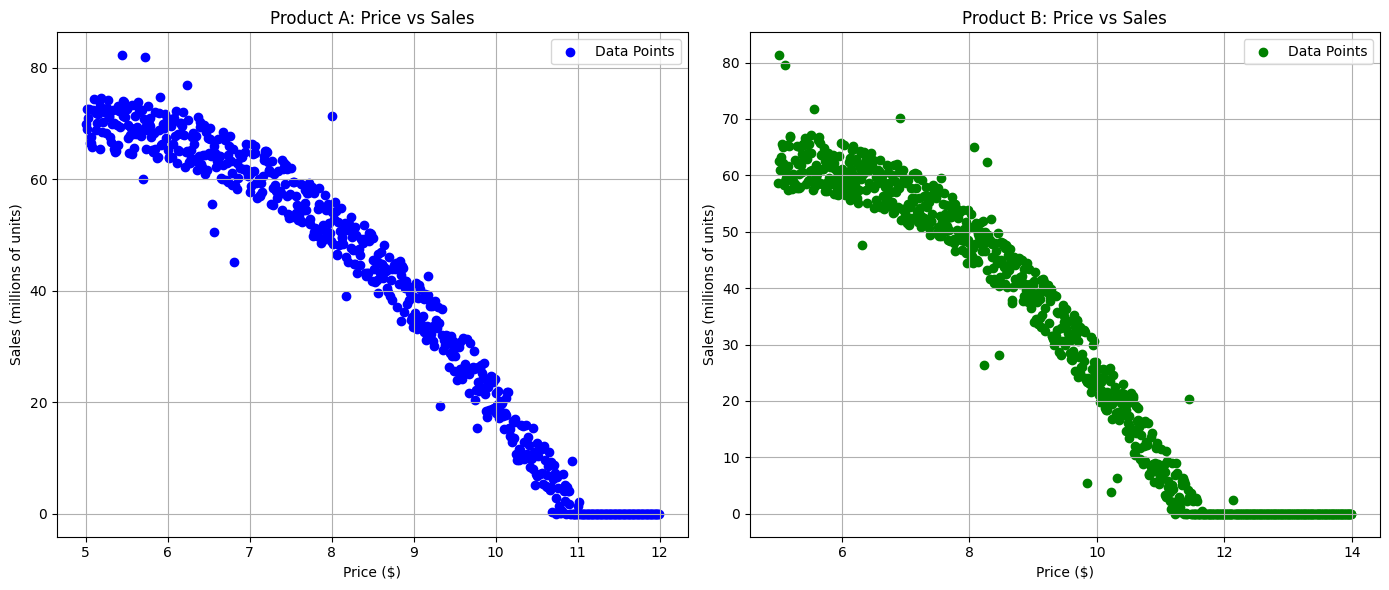

In [2]:
# Plotting data for Product A and Product B
plt.figure(figsize=(14, 6))

# Plot for Product A
plt.subplot(1, 2, 1)
plt.scatter(data['Price Product A ($)'], data['Sales Product A (millions of unit)'], color='blue', label='Data Points')
plt.title('Product A: Price vs Sales')
plt.xlabel('Price ($)')
plt.ylabel('Sales (millions of units)')
plt.grid(True)
plt.legend()

# Plot for Product B
plt.subplot(1, 2, 2)
plt.scatter(data['Price Product B ($)'], data['Sales Product B (millions of unit)'], color='green', label='Data Points')
plt.title('Product B: Price vs Sales')
plt.xlabel('Price ($)')
plt.ylabel('Sales (millions of units)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
# Clean the data by removing rows with missing or zero sales
cleaned_data = data.dropna()
cleaned_data = cleaned_data[
    (cleaned_data['Sales Product A (millions of unit)'] > 0) &
    (cleaned_data['Sales Product B (millions of unit)'] > 0)
]

# Fitting polynomial regression models again
prices_A_clean = cleaned_data['Price Product A ($)']
sales_A_clean = cleaned_data['Sales Product A (millions of unit)']
poly_model_A_clean = Polynomial.fit(prices_A_clean, sales_A_clean, deg=2)

prices_B_clean = cleaned_data['Price Product B ($)']
sales_B_clean = cleaned_data['Sales Product B (millions of unit)']
poly_model_B_clean = Polynomial.fit(prices_B_clean, sales_B_clean, deg=2)

# Display the polynomial coefficients for both models
poly_model_A_coef_clean = poly_model_A_clean.convert().coef
poly_model_B_coef_clean = poly_model_B_clean.convert().coef

poly_model_A_coef_clean, poly_model_B_coef_clean

(array([27.48441806, 18.11093242, -1.88178298]),
 array([23.59787746, 15.30001714, -1.51673261]))

In [6]:
# Redefine revenue functions for clarity
revenue_A = lambda p: poly_model_A_clean(p) * p
revenue_B = lambda p: poly_model_B_clean(p) * p

# Evaluate the revenue functions over a range of prices
price_range_A = np.linspace(min(prices_A_clean), max(prices_A_clean), 1000)
price_range_B = np.linspace(min(prices_B_clean), max(prices_B_clean), 1000)

revenue_A_values = revenue_A(price_range_A)
revenue_B_values = revenue_B(price_range_B)

# Find the optimal prices that maximize revenue
optimal_price_A = price_range_A[np.argmax(revenue_A_values)]
optimal_price_B = price_range_B[np.argmax(revenue_B_values)]

optimal_price_A, optimal_price_B

(7.103083083083083, 7.426026026026026)

In [8]:
# Define units sold and visitor ratios
units_sold = {
    'Amazon': [90, 86, 70],
    'Walmart': [52.5, 51, 48],
    'Target': [27, 31, 37]
}
visitor_ratios = {
    'Amazon': 0.5,
    'Walmart': 0.3,
    'Target': 0.2
}
products = ['Product A', 'Product B', 'Product C']

# Calculate expected sales for each combination
expected_sales = {
    platform: [units * visitor_ratios[platform] for units in units_sold[platform]]
    for platform in units_sold
}

# Create a DataFrame to display the results
expected_sales_df = pd.DataFrame(expected_sales, index=products)

# Identify the best combination
best_combination = expected_sales_df.stack().idxmax()
max_sales = expected_sales_df.max().max()

expected_sales_df, best_combination, max_sales

(           Amazon  Walmart  Target
 Product A    45.0    15.75     5.4
 Product B    43.0    15.30     6.2
 Product C    35.0    14.40     7.4,
 ('Product A', 'Amazon'),
 45.0)

The combination with the highest expected sales is Product A on Amazon, with an expected value of 45,000 units.

In [10]:
import os
import zipfile

# Create directory structure
output_dir = '/notebooks/'
os.makedirs(output_dir, exist_ok=True)

# Python code for the solution of both questions
question_1_code = """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Load the data
data = pd.read_csv('data.csv')

# Clean the data
cleaned_data = data.dropna()
cleaned_data = cleaned_data[
    (cleaned_data['Sales Product A (millions of unit)'] > 0) &
    (cleaned_data['Sales Product B (millions of unit)'] > 0)
]

# Plotting data
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(cleaned_data['Price Product A ($)'], cleaned_data['Sales Product A (millions of unit)'], color='blue')
plt.title('Product A: Price vs Sales')
plt.xlabel('Price ($)')
plt.ylabel('Sales (millions of units)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(cleaned_data['Price Product B ($)'], cleaned_data['Sales Product B (millions of unit)'], color='green')
plt.title('Product B: Price vs Sales')
plt.xlabel('Price ($)')
plt.ylabel('Sales (millions of units)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Fitting polynomial models
poly_model_A = Polynomial.fit(cleaned_data['Price Product A ($)'], cleaned_data['Sales Product A (millions of unit)'], deg=2)
poly_model_B = Polynomial.fit(cleaned_data['Price Product B ($)'], cleaned_data['Sales Product B (millions of unit)'], deg=2)

# Finding optimal price
revenue_A = lambda p: poly_model_A(p) * p
revenue_B = lambda p: poly_model_B(p) * p
price_range_A = np.linspace(min(cleaned_data['Price Product A ($)']), max(cleaned_data['Price Product A ($)']), 1000)
price_range_B = np.linspace(min(cleaned_data['Price Product B ($)']), max(cleaned_data['Price Product B ($)']), 1000)
optimal_price_A = price_range_A[np.argmax(revenue_A(price_range_A))]
optimal_price_B = price_range_B[np.argmax(revenue_B(price_range_B))]

print(f"Optimal price for Product A: ${optimal_price_A:.2f}")
print(f"Optimal price for Product B: ${optimal_price_B:.2f}")
"""

question_2_code = """
import pandas as pd

# Define units sold and visitor ratios
units_sold = {
    'Amazon': [90, 86, 70],
    'Walmart': [52.5, 51, 48],
    'Target': [27, 31, 37]
}
visitor_ratios = {
    'Amazon': 0.5,
    'Walmart': 0.3,
    'Target': 0.2
}
products = ['Product A', 'Product B', 'Product C']

# Calculate expected sales for each combination
expected_sales = {
    platform: [units * visitor_ratios[platform] for units in units_sold[platform]]
    for platform in units_sold
}

# Create a DataFrame to display the results
expected_sales_df = pd.DataFrame(expected_sales, index=products)
print(expected_sales_df)

# Identify the best combination
best_combination = expected_sales_df.stack().idxmax()
max_sales = expected_sales_df.max().max()
print(f"The best combination is {best_combination} with {max_sales} thousand units expected.")
"""

readme_content = """
# Applied Math Data Analyst Assessment Solutions

## Overview
This repository contains Python scripts that provide solutions to the two assessment questions.

### Question 1
- **Task**: Analyze the relationship between price and sales, fit a model, and recommend the optimal selling price for two products.
- **Implementation**: The script reads the provided `data.csv` file, visualizes the data, fits polynomial models, and calculates the optimal price for each product.

### Question 2
- **Task**: Calculate expected sales for products on different e-commerce platforms using given visitor ratios and identify the best product-platform combination.
- **Implementation**: The script calculates the expected sales based on the given data and displays the platform-product combination with the highest expected sales.

## How to Run
1. Ensure Python 3.x is installed with the required libraries (`pandas`, `numpy`, `matplotlib`).
2. Run the scripts by executing `python question_1.py` and `python question_2.py` in your terminal.
3. Place the `data.csv` file in the same directory as the scripts for Question 1.

## Dependencies
- pandas
- numpy
- matplotlib
"""

# Save the code and README file
with open(os.path.join(output_dir, 'question_1.py'), 'w') as file:
    file.write(question_1_code)

with open(os.path.join(output_dir, 'question_2.py'), 'w') as file:
    file.write(question_2_code)

with open(os.path.join(output_dir, 'README.txt'), 'w') as file:
    file.write(readme_content)

# Create a zip file
zip_path = 'assessment_solution.zip'
with zipfile.ZipFile(zip_path, 'w') as zipf:
    for filename in ['question_1.py', 'question_2.py', 'README.txt']:
        zipf.write(os.path.join(output_dir, filename), filename)

zip_path


'assessment_solution.zip'